# HSQL sums and spider plots

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Load data

In [9]:
grl_dir = "../../../data/processed/santiago/"

### Load data - Load areas of analysis

In [3]:
alameda = gpd.read_file(grl_dir + "buffer_800m_nueva_alameda_32719.gpkg")
alameda = alameda.to_crs("EPSG:4326")

santiago_viv = gpd.read_file(grl_dir + "viviendas_por_tipo_mnz_32719.gpkg")
santiago_viv = santiago_viv.to_crs("EPSG:4326")

DriverError: ../../../data/external/temporal_todocker/santiago/proximidad/buffer_800m_nueva_alameda_32719.gpkg: No such file or directory

In [6]:
#santiago_aoi = aup.gdf_from_db('santiago_aoi','projects_research')

In [7]:
#poniente = gpd.read_file(grl_dir + 'alameda_poniente.gpkg')

In [8]:
#oriente = gpd.read_file(grl_dir + 'alameda_oriente.gpkg')

In [9]:
#alameda_ext = gpd.read_file(grl_dir + 'extended_alameda_800m_buffer.gpkg')

In [11]:
santiago_viv = gpd.read_file(grl_dir + "viv_area.gpkg")
santiago_viv = santiago_viv.to_crs("EPSG:4326")

In [12]:
alameda = gpd.read_file(grl_dir + "buffer 800m nueva alameda.shp")
alameda = alameda.to_crs("EPSG:4326")

### Load data - Load hexagons with proximity data

In [13]:
res8_query = 'SELECT * FROM projects_research.santiago_hexproximity_4_5_kmh WHERE res = 8'
hex8_gdf = aup.gdf_from_query(res8_query)

# Show
print(hex8_gdf.shape)
hex8_gdf.head(1)

(4291, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,88b2c0b001fffff,"POLYGON ((-71.00896 -33.70843, -71.01339 -33.7...",105.780441,0.0,130.5914,0.0,90.375835,0.0,570.971609,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
res9_query = 'SELECT * FROM projects_research.santiago_hexproximity_4_5_kmh WHERE res = 9'
hex9_gdf = aup.gdf_from_query(res9_query)

# Show
print(hex9_gdf.shape)
hex9_gdf.head(1)

(30073, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,89b2c555d6fffff,"POLYGON ((-70.68506 -33.47780, -70.68624 -33.4...",25.291604,0.0,34.67271,0.0,6.78164,1.147059,44.117349,0.0,...,0.020597,0.489852,0.510449,0.013164,0.016145,0.029309,0.365348,0.365348,1.291655,1.291655


### Load data - Load source matrix (summary base table)

In [15]:
df_summary = pd.read_csv(grl_dir + 'source_matrix.csv',encoding='utf-8') #encoding='iso-8859-1' 28,31,37,38,41,49,50,51
df_summary

,Function,Theme,Indicator,Variable,Source name
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar
2,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries
3,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market
4,Supplies,GROCERIES,General supply,CIty fairs,ferias
5,Supplies,GROCERIES,General supply,Supermarkets,supermercado
6,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv
7,Caring,HEALTH,Health care,NaN,clinica_pub
8,Caring,HEALTH,Health care,Hospitals,hospital_priv
9,Caring,HEALTH,Health care,NaN,hospital_pub


## Pre-process data - Create HQSL

In [65]:
def calculate_hqsl(hex_gdf, hex_gdf_8):
    #parameters_dict = {social_functions:{themes:[sources]}}
    parameters_dict = {'supplies':{'groceries':['carniceria','hogar','local_mini_market','bakeries','ferias','supermercado']},
                   'caring':{'health':['clinica_priv','clinica_pub','hospital_priv','hospital_pub','consult_ado_priv','consult_ado_pub','residencia_adumayor','farmacia'],
                            'exercise':['club_deportivo','eq_deportivo_pub','eq_deportivo_priv']},
                   'living':{'errands_paperwork':['civic_office','tax_collection','social_security','banco'],
                             'fresh_air':['ep_plaza_small','ep_plaza_big']},
                   'enjoying':{'culture':['museos_priv','museos_pub','bibliotecas','sitios_historicos'],
                               'entertainment':['cines','librerias','restaurantes_bar_cafe']},
                   'learning':{'education':['edu_basica_priv','edu_basica_pub','edu_media_priv','edu_media_pub','jardin_inf_pub','jardin_inf_priv','edu_especial_priv','edu_especial_pub']},
                   'working':{'sustainable_mobility':['ciclovias','paradas_tp','paradas_tp_tren','paradas_tp_metro']}}
    
    # scale count source values
    # proxhexs_countprocess = hex_gdf.copy()
    # scalar_count_column_list = []

    for social_function in parameters_dict.keys():
        aup.log(f"--- {social_function}")
        for theme in parameters_dict[social_function]:
            aup.log(f"------ {theme}")
            for source in parameters_dict[social_function][theme]:

                # Set col name of interest and find min and max values
                count_colname = f"{source}_count_15min"
                hex_gdf[count_colname] = hex_gdf[count_colname] + 0.01
                min_val = np.log(hex_gdf[count_colname]).min()
                max_val = np.log(hex_gdf[count_colname]).max()
                print(f"for col {count_colname} max_val: {max_val} and min_val: {min_val}")
                # Calculate MinMax Scalar
                hex_gdf[f"{source}_scaledcount"] = hex_gdf[count_colname].apply(lambda x: 10 * ((np.log(x) - min_val) /(max_val - min_val)))
                # hex_gdf.loc[hex_gdf[f"{source}_scaledcount"]>100, f"{source}_scaledcount"] = 100
                aup.log(f"------ Scaled {source} count.")
                ''' # Drop original count col
                hex_gdf.drop(columns=[count_colname],inplace=True)
                # Add
                scalar_count_column_list.append(f"{source}_scaledcount")'''

    # Keep columns of interest only
    # proxhexs_countprocess = proxhexs_countprocess[['hex_id','geometry']+scalar_count_column_list+['res','city']]
    aup.log(f"--- Scaled count columns added to hex_gdf.")
    aup.log(f"--- Starting social function analysis.")
    sum_count_column_list = []

    for social_function in parameters_dict.keys():
        # Set social function sources list
        sf_sources_list = []
        
        for theme in parameters_dict[social_function]:
            # Set theme_sources_list and feed sf_sources_list
            theme_sources_list = []
            for source in parameters_dict[social_function][theme]:
                theme_sources_list.append(f"{source}_scaledcount")
                sf_sources_list.append(f"{source}_scaledcount")

            
            # Find sum of count anlysis for theme
            hex_gdf[f"{theme}_count"] = hex_gdf[theme_sources_list].sum(axis=1)
            aup.log(f"------ Summed {theme} count with a mean value of " + str(round(hex_gdf[f"{theme}_count"].mean(),4)))
            sum_count_column_list.append(f"{theme}_count")
            
        # Find sum of count anlysis for social function
        hex_gdf[f"{social_function}_count"] = hex_gdf[sf_sources_list].sum(axis=1)
        aup.log(f"--- Summed {social_function} count with a mean value of {round(hex_gdf[f'{social_function}_count'].mean(),4)}.")
        sum_count_column_list.append(f"{social_function}_count")

    social_fn_cols = []
    for k in parameters_dict.keys():
        social_fn_cols.append(k+'_count')
    
    hex_gdf['hqsl'] = hex_gdf[social_fn_cols[0]] + hex_gdf[social_fn_cols[1]] + hex_gdf[social_fn_cols[2]] + hex_gdf[social_fn_cols[3]] + hex_gdf[social_fn_cols[4]] + hex_gdf[social_fn_cols[5]]
    aup.log(f"--- Calculated HQSL with a mean value of {round(hex_gdf['hqsl'].mean(),4)}.")
        

    return hex_gdf

In [66]:
hex_gdf = hex9_gdf.copy()

In [67]:
hex_gdf = calculate_hqsl(hex_gdf, hex8_gdf)

for col carniceria_count_15min max_val: 2.303584593327129 and min_val: -4.605170185988091
for col hogar_count_15min max_val: 3.2962071678045244 and min_val: -4.605170185988091
for col local_mini_market_count_15min max_val: 4.545638059286748 and min_val: -4.605170185988091
for col bakeries_count_15min max_val: 3.919255610498369 and min_val: -4.605170185988091
for col ferias_count_15min max_val: 2.125450062887391 and min_val: -4.605170185988091
for col supermercado_count_15min max_val: 2.683634900484669 and min_val: -4.605170185988091
for col clinica_priv_count_15min max_val: 2.9766638664481064 and min_val: -4.605170185988091
for col clinica_pub_count_15min max_val: 1.7245507195346048 and min_val: -4.605170185988091
for col hospital_priv_count_15min max_val: 0.6981347220709843 and min_val: -4.605170185988091
for col hospital_pub_count_15min max_val: 1.5922433098544189 and min_val: -4.605170185988091
for col consult_ado_priv_count_15min max_val: 2.5194501522319337 and min_val: -4.60517018

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


In [68]:
import seaborn as sns

In [69]:
import numpy as np
#E.g log_2(8) 

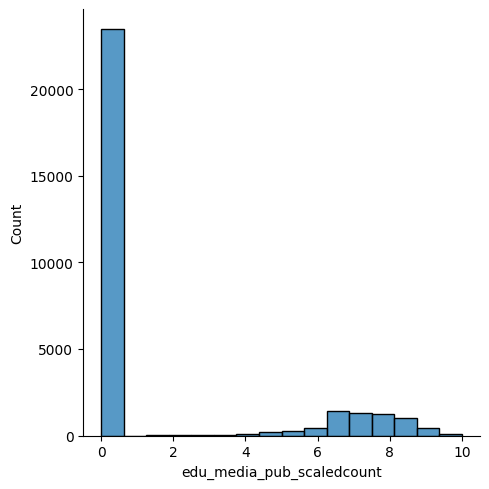

In [70]:
sns.displot(hex_gdf, x="edu_media_pub_scaledcount")

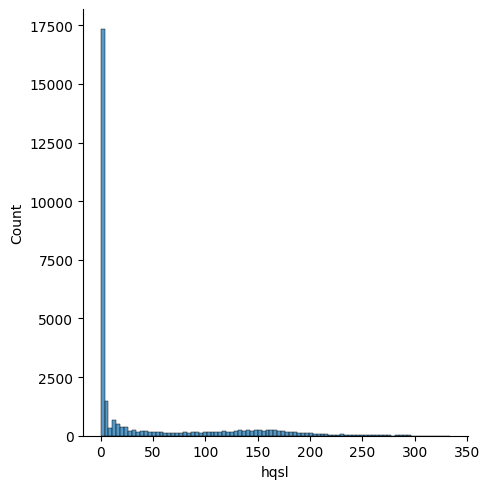

In [71]:
sns.displot(hex_gdf, x=hex_gdf["hqsl"])

<AxesSubplot: >

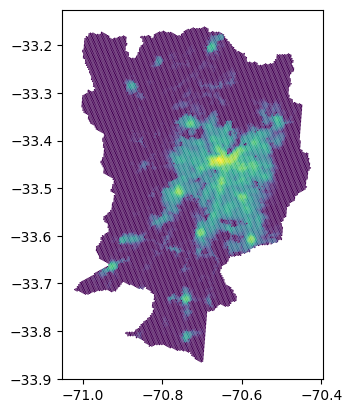

In [72]:
hex_gdf.plot('hqsl')

### Get social function count columns

In [21]:
parameters_dict = {'supplies':{'groceries':['carniceria','hogar','local_mini_market','ferias','supermercado']},
                   'caring':{'health':['clinica_priv','clinica_pub','hospital_priv','hospital_pub','consult_ado_priv','consult_ado_pub','residencia_adumayor','farmacia'],
                            'exercise':['club_deportivo','eq_deportivo_pub','eq_deportivo_priv']},
                   'living':{'errands_paperwork':['civic_office','tax_collection','social_security','banco'],
                             'fresh_air':['ep_plaza_small','ep_plaza_big']},
                   'enjoying':{'culture':['museos_priv','museos_pub','bibliotecas','sitios_historicos'],
                               'entertainment':['cines','librerias','restaurantes_bar_cafe']},
                   'learning':{'education':['edu_basica_priv','edu_basica_pub','edu_media_priv','edu_media_pub','jardin_inf_pub','jardin_inf_priv','edu_especial_priv','edu_especial_pub']},
                   'working':{'sustainable_mobility':['ciclovias','paradas_tp','paradas_tp_tren','paradas_tp_metro']}}

social_fn_cols = []

for k in parameters_dict.keys():
    social_fn_cols.append(k+'_count')

# Show
social_fn_cols

['supplies_count',
 'caring_count',
 'living_count',
 'enjoying_count',
 'learning_count',
 'working_count']

### Pre-process data - Normalize data by social function before creating HQSL

In [24]:
# Use hex8_gdf values as min/max values instead of hex9_gdf values?
use_hex8 = True

In [23]:
hex_gdf = hex9_gdf.copy()
for sc in social_fn_cols:
    if use_hex8:
        hex_gdf[sc] = 5 * (hex_gdf[sc] - hex8_gdf[sc].min()) / (hex8_gdf[sc].max() - hex8_gdf[sc].min())
    else:
        hex_gdf[sc] = 5 * (hex_gdf[sc] - hex_gdf[sc].min()) / (hex_gdf[sc].max() - hex_gdf[sc].min())

# Show
print(hex_gdf.shape)
hex_gdf.head(1)

(30073, 147)


,hex_id,geometry,supermercado_time,supermercado_count_15min,clinica_priv_time,clinica_priv_count_15min,clinica_pub_time,clinica_pub_count_15min,hospital_priv_time,hospital_priv_count_15min,...,errands_paperwork_count,fresh_air_count,living_count,culture_count,entertainment_count,enjoying_count,education_count,learning_count,sustainable_mobility_count,working_count
0,89b2c555d6fffff,"POLYGON ((-70.68506 -33.47780, -70.68624 -33.4...",25.291604,0.0,34.67271,0.0,6.78164,1.147059,44.117349,0.0,...,0.020597,0.489852,0.603321,0.013164,0.016145,0.026191,0.365348,0.410306,1.291655,2.530158


### Pre-process data - Create HQSL

<Axes: >

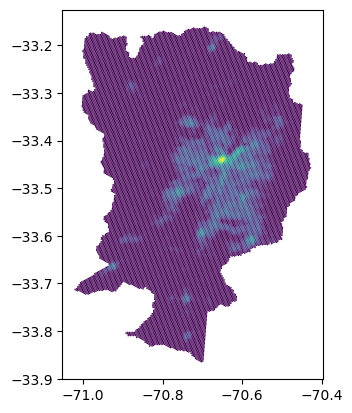

In [25]:
hex_gdf['hqsl'] = hex_gdf[social_fn_cols[0]] + hex_gdf[social_fn_cols[1]] + hex_gdf[social_fn_cols[2]] + hex_gdf[social_fn_cols[3]] + hex_gdf[social_fn_cols[4]] + hex_gdf[social_fn_cols[5]]
hex_gdf.plot('hqsl')

<AxesSubplot: >

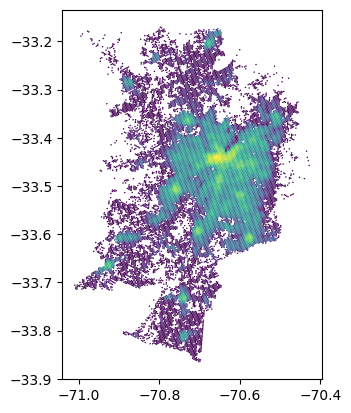

In [73]:
hex_gdf = hex_gdf.loc[hex_gdf.supermercado_time>0].copy()
hex_gdf.plot('hqsl')

### Show statistical summary (All data)

In [74]:
summary_cols = social_fn_cols
if 'hqsl' not in summary_cols:
    summary_cols.append('hqsl')

hex_gdf[summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000,16915.000000
mean,14.678902,15.233358,11.794874,5.531087,16.346861,8.291814,71.876895
std,16.764933,17.785146,12.288791,8.622103,17.940357,8.571070,76.215272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.206593
50%,5.840906,6.060750,11.400890,0.000000,7.917427,5.982673,37.453901
75%,30.696526,29.102984,20.122264,6.667761,32.628786,15.062102,138.316449
max,54.386036,89.020188,57.173799,68.155732,73.134007,36.700942,333.889630


### Show res value by source name (All data)

In [55]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_gdf.columns:
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_gdf[col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,0.055679
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,0.028947
2,Supplies,GROCERIES,Specific supply,Greengrocers,NaN,NaN
3,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,0.026648
4,Supplies,GROCERIES,Specific supply,Health food shops,NaN,NaN
5,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,0.024828
6,Supplies,GROCERIES,General supply,CIty fairs,ferias,0.096211
7,Supplies,GROCERIES,General supply,Supermarkets,supermercado,0.050198
8,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,0.017206
9,Caring,HEALTH,Health care,Neighborhood clinics,clinica_pub,0.077199


## Filter data by spatial area

#### __Select area of interest manually__

In [68]:
# 'Santiago_alameda' or 'Santiago_household'
area = 'Santiago_household'

In [57]:
if area == 'Santiago_household':
    aoi = santiago_viv.to_crs("EPSG:4326")
elif area == 'Santiago_alameda':
    aoi = alameda.to_crs("EPSG:4326")

### Clip hexagons to spatial area

In [58]:
# Get hexs area
hex_gdf['area_ha'] = hex_gdf.to_crs("EPSG:32719").area / 10000
# Clip hexagons to area of interest
hex_clip = gpd.clip(hex_gdf, aoi)
# Keep hexs only if at least 10% of hex inside area of interest
hex_clip['area_clip'] = hex_clip.to_crs("EPSG:32719").area / 10000
hex_clip['area_pct'] = hex_clip['area_clip'] / hex_clip['area_ha']
hex_clip = hex_clip.loc[hex_clip.area_pct>=0.1].copy()

<Axes: >

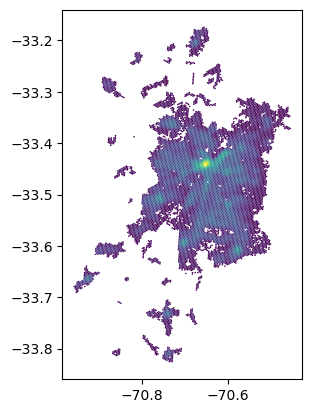

In [62]:
hex_list = list(hex_clip.hex_id.unique())
hex_spatial = hex_gdf.loc[hex_gdf.hex_id.isin(hex_list)].copy()
hex_spatial.plot('hqsl')

### Show statistical summary (Selected spatial area)

In [63]:
hex_spatial[summary_cols].describe()

,supplies_count,caring_count,living_count,enjoying_count,learning_count,working_count,hqsl
count,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000,9685.000000
mean,0.749545,0.637724,0.582570,0.135272,0.834438,0.749677,3.689226
std,0.772974,0.657338,0.495723,0.336626,0.748243,0.771538,3.257056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.106024,0.071224,0.197839,0.000000,0.191227,0.099920,0.822125
50%,0.566165,0.490124,0.507407,0.013356,0.712650,0.567820,3.282426
75%,1.154954,1.019842,0.864612,0.128346,1.330747,1.156716,5.697736
max,5.950764,5.810437,5.377855,5.484082,5.598165,5.305928,29.170365


### Show res value by source name (Selected spatial area)

In [64]:
df_summary['res_value'] = np.nan

for source in df_summary['Source name']:
    if pd.isna(source):
        continue
    for col in hex_spatial.columns:
        if source in col and 'scaled' in col:
            df_summary.loc[df_summary['Source name']==source, 'res_value'] = hex_spatial[col].mean()
df_summary

,Function,Theme,Indicator,Variable,Source name,res_value
0,Supplies,GROCERIES,Specific supply,Butcher/Fish Shops,carniceria,0.095271
1,Supplies,GROCERIES,Specific supply,Hardware/ Paint stores,hogar,0.048471
2,Supplies,GROCERIES,Specific supply,Greengrocers,NaN,NaN
3,Supplies,GROCERIES,Specific supply,Bakeries and delis,bakeries,0.045704
4,Supplies,GROCERIES,Specific supply,Health food shops,NaN,NaN
5,Supplies,GROCERIES,General supply,Local and mini markets,local_mini_market,0.042379
6,Supplies,GROCERIES,General supply,CIty fairs,ferias,0.165715
7,Supplies,GROCERIES,General supply,Supermarkets,supermercado,0.085746
8,Caring,HEALTH,Health care,Neighborhood clinics,clinica_priv,0.029616
9,Caring,HEALTH,Health care,Neighborhood clinics,clinica_pub,0.131145


#### Save data

In [71]:
if use_hex8:
    area_name = area+"_res8MinMax"
else:
    area_name = area+"_res9MinMax"

# Save gdf
hex_spatial.to_file(f'../../../output/data/santiago/SocialFunctions_{area_name}.geojson')

### Spatial area polar graph

In [80]:
import textwrap
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
import math #importing the math functions
import matplotlib.pyplot as plt

In [73]:
pi = math.pi

In [78]:
gdf_polar = hex_spatial[social_fn_cols].mean(axis=0)
gdf_polar

supplies_count    0.749545
caring_count      0.637724
living_count      0.582570
enjoying_count    0.135272
learning_count    0.834438
working_count     0.749677
hqsl              3.689226
dtype: float64

In [79]:
df = gdf_polar.copy()
df = pd.DataFrame(df).reset_index()
df.index = [0]*len(df)
df = df.rename(columns={'index':'social_fn',0:'value'})
df = df.pivot(columns='social_fn', values='value')
df

social_fn,caring_count,enjoying_count,hqsl,learning_count,living_count,supplies_count,working_count
0,0.637724,0.135272,3.689226,0.834438,0.58257,0.749545,0.749677


In [85]:
def wrap_labels(ax, width, rotation, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=rotation, )

def make_spider(df, row, color, title, alpha, linewidth, zorder):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5), )
 
    ax = plt.subplot(1,1,1, polar=True, )
 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=8,zorder=10)
    ax.tick_params(axis='x', rotation=0,pad=18, zorder=10)
    # ax.set_xlabel(labelpad=10)
    
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ['1','2','3','4','5'], color="black", size=10, zorder=10)
    plt.ylim(0,5)
     
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=linewidth, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = alpha, zorder=zorder)
         
    wrap_labels(ax, 15, 0)
  
    title = "Radar showing performance in each subject for "+ title
    plt.title(title, fontsize=10, x = 0.5, y = 1.1)

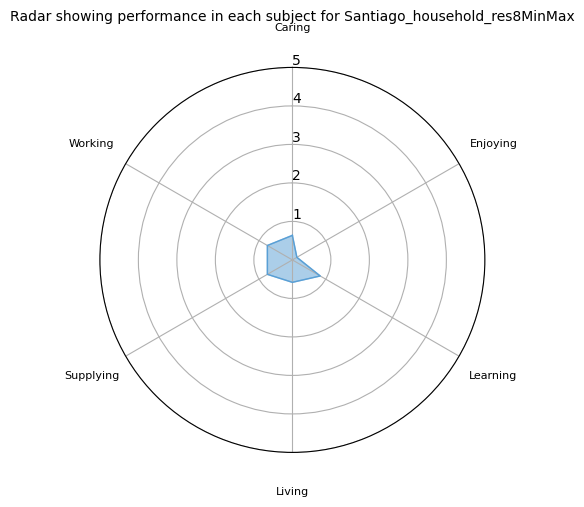

In [87]:
plt.figure()

color = '#599fd5'
df = df.rename(columns={'caring_count':'Caring',
                       'working_count':'Working',
                       'enjoying_count':'Enjoying',
                       'supplies_count':'Supplying',
                        'living_count':'Living',
                        'learning_count':'Learning'})
make_spider(row=0, df = df.drop(columns='hqsl'), title =area_name, 
            color = color, alpha=0.5, linewidth=1, zorder=-1)

#plt.savefig(f'../../../output/figures/santiago/SocialFunctions_{area_name}.svg')